In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import gradio as gr
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
df = df.dropna(axis=0)

In [5]:
y = df.Price
df_features = ['Rooms','Bathroom','Landsize','Distance','BuildingArea']
X = df[df_features]

In [6]:
X.describe()

,Rooms,Bathroom,Landsize,Distance,BuildingArea
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,9.751097,141.568645
std,0.971079,0.711362,897.449881,5.612065,90.834824
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,152.000000,5.900000,91.000000
50%,3.000000,1.000000,373.000000,9.000000,124.000000
75%,4.000000,2.000000,628.000000,12.400000,170.000000
max,8.000000,8.000000,37000.000000,47.400000,3112.000000


In [7]:
X.corr()

,Rooms,Bathroom,Landsize,Distance,BuildingArea
Rooms,1.000000,0.613853,0.098755,0.283885,0.608215
Bathroom,0.613853,1.000000,0.076295,0.124530,0.534425
Landsize,0.098755,0.076295,1.000000,0.059369,0.084825
Distance,0.283885,0.124530,0.059369,1.000000,0.159603
BuildingArea,0.608215,0.534425,0.084825,0.159603,1.000000


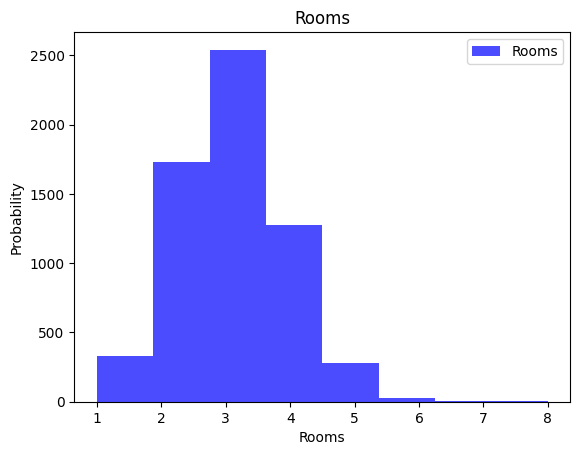

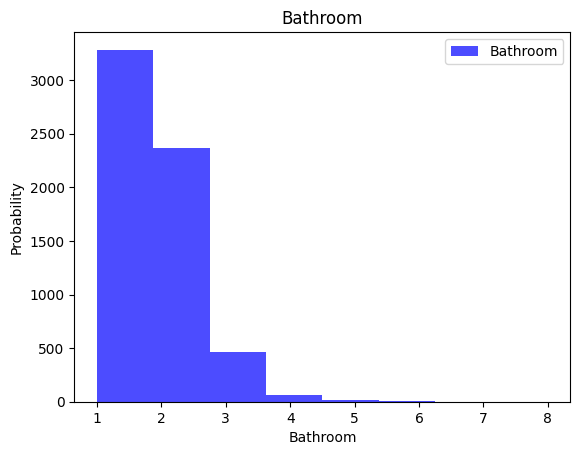

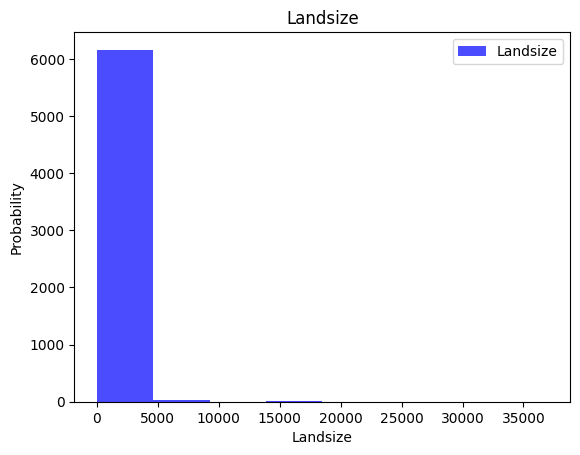

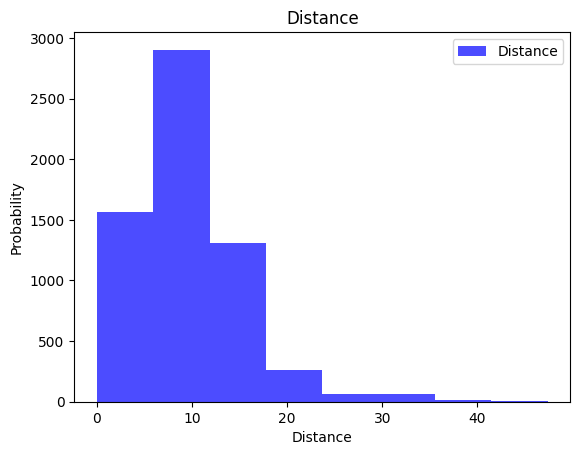

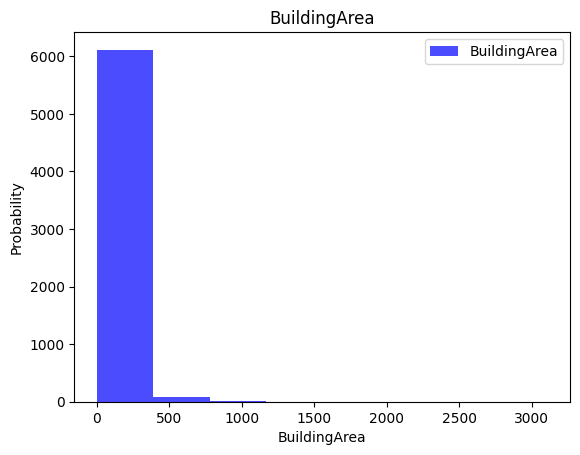

In [8]:
for i in range(len(X.columns)):
    label = X.columns[i]
    plt.hist(X[label], color='blue', label=label, alpha=0.7, bins=8)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [9]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [10]:
#Define model
model = DecisionTreeRegressor(random_state=0, max_leaf_nodes =80)
# Fit model
model.fit(train_X,train_y)

DecisionTreeRegressor(max_leaf_nodes=80, random_state=0)

In [11]:
pred = model.predict(val_X)
mean_absolute_error(val_y, pred)

285122.64614649245

##### Random Forest model

In [12]:
f_model = RandomForestRegressor(random_state=1, max_leaf_nodes=80)
f_model.fit(train_X, train_y)
with open('forest_model.pkl','wb') as f:
    pickle.dump(f_model,f)

NameError: name 'pickle' is not defined

In [ ]:
f_pred = f_model.predict(val_X)

In [ ]:
print(mean_absolute_error(val_y, f_pred))

268619.0745330753


In [13]:
def make_prediction(rooms, bathrooms, lot_size, distance, building_area):
        prediction = f_model.predict([[rooms, bathrooms, lot_size, distance, building_area]])
        return prediction

room_input = gr.Number(label="Enter the number of rooms")
bathroom_input = gr.Number(label='Enter the number of bathrooms')
lot_input = gr.Number(label='Enter the size of the lot')
distance_input = gr.Number(label='Enter the distance (in miles) from downtown Melbourne')
area_input = gr.Number(label='Enter the building size')
output = gr.Textbox()

app = gr.Interface(fn = make_prediction, inputs=[room_input,bathroom_input,lot_input,distance_input,area_input], outputs=output)
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x21f23d446a0>, 'http://127.0.0.1:7860/', None)

C:\Users\tjasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\tjasi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
